In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from ISLP.models import summarize

In [2]:
data = pd.read_csv('../datasets/Carseats.csv')
data = data[['Sales', 'Price', 'Urban', 'US']]
data.head()

,Sales,Price,Urban,US
0,9.50,120,Yes,Yes
1,11.22,83,Yes,Yes
2,10.06,80,Yes,Yes
3,7.40,97,Yes,Yes
4,4.15,128,Yes,No


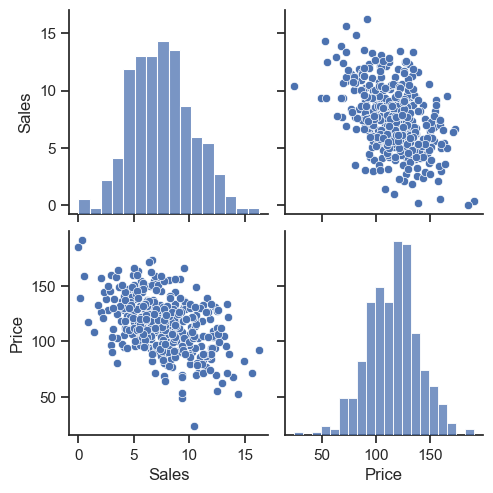

In [3]:
sns.set_theme(style="ticks")
sns.pairplot(data)

In [4]:
model2 = smf.ols(formula='Sales ~ Price + Urban + US + Price*Urban + Price*US + Urban*US', data=data)
#model2 = smf.ols(formula='Sales ~ Price + Urban + US', data=data)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     21.45
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           8.15e-22
Time:                        10:46:34   Log-Likelihood:                -925.69
No. Observations:                 400   AIC:                             1865.
Df Residuals:                     393   BIC:                             1893.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.5143      1.359      9.941      0.000      10.842      16.187
Urban[T.Yes]              -0.7347      1.401     -0.525      0.600      -3.488       2.019
US[T.Yes]                  1.9441      1.300      1.496      0.135      -0.611       4.499
Urban[T.Yes]:US[T.Yes]    -0.9747      0.561     -1.738      0.083      -2.077       0.128
Price                     -0.0622      0.012     -5.387      0.000      -0.085      -0.039
Price:Urban[T.Yes]         0.0115      0.012      0.986      0.325      -0.011       0.034
Price:US[T.Yes]           -0.0006      0.011     -0.061      0.952      -0.022       0.020
==============================================================================
Omnibus:                        1.004   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                1.028
Skew:                           0.121   Prob(JB):                        0.598
Kurtosis:                       2.940   Cond. No.                     2.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
summarize(results2)

,coef,std err,t,P>|t|
Intercept,13.5143,1.359,9.941,0.000
Urban[T.Yes],-0.7347,1.401,-0.525,0.600
US[T.Yes],1.9441,1.300,1.496,0.135
Urban[T.Yes]:US[T.Yes],-0.9747,0.561,-1.738,0.083
Price,-0.0622,0.012,-5.387,0.000
Price:Urban[T.Yes],0.0115,0.012,0.986,0.325
Price:US[T.Yes],-0.0006,0.011,-0.061,0.952


# Interpretation of each coefficient in the model

* Price: an increase of one unit of price decreases sales by 0.0545 units (or an increase of 1000 in price decreases sales by 54.5 units).
* US (Yes): US variable can be 0 or 1. If it is 1, sales increase by 1.2006.
* Urban (Yes): Urban variable can be 0 or 1. If it is 1, sales decrease by 0.0219. In this case, the p-value is too high, so there is no evidence of a true relashionship between Urban and Sales.

In [6]:
# Fit a second model without the urban predictor
model3 = smf.ols(formula='Sales ~ Price + US + Price*US', data=data)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 26 Dec 2023   Prob (F-statistic):           2.39e-23
Time:                        10:46:34   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.9748      0.953     13.614      0.000      11.101      14.849
US[T.Yes]           1.2958      1.252      1.035      0.301      -1.166       3.757
Price              -0.0540      0.008     -6.613      0.000      -0.070      -0.038
Price:US[T.Yes]    -0.0008      0.011     -0.078      0.937      -0.022       0.020
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.740
Skew:                           0.092   Prob(JB):                        0.691
Kurtosis:                       2.898   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

42

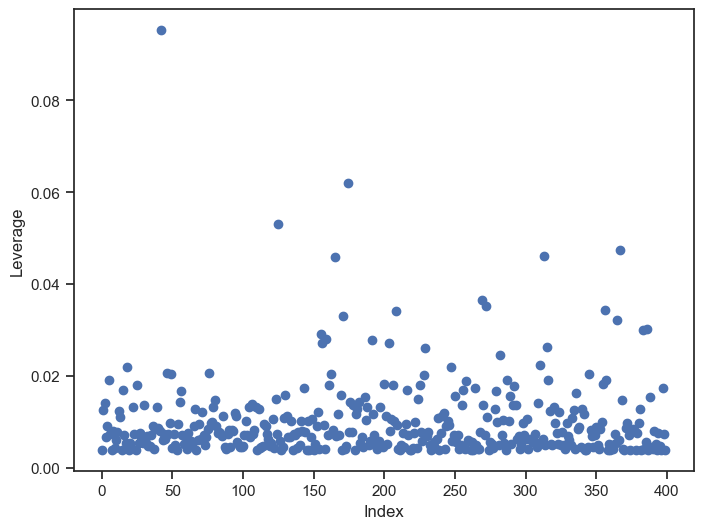

In [9]:
infl = results3.get_influence()
ax = plt.subplots(figsize=(8,6))[1]
ax.scatter(np.arange(data.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

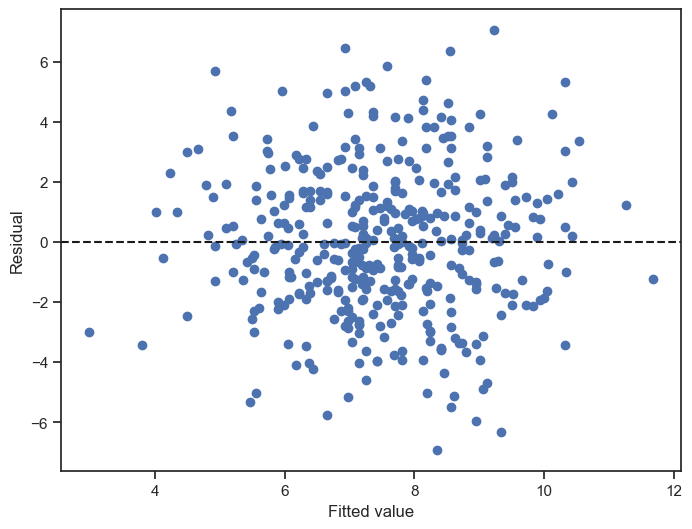

In [10]:
ax = plt.subplots(figsize=(8,6))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')